In [1]:
#Ilai Fleitman
#Regresión logistica Python
import numpy as np
import pandas as pd
import sympy 
from sympy import Symbol
from sympy import *
#from numpy import *
from matplotlib.pyplot import *
from sympy.plotting import plot3d
import pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sympy import plot_implicit
import numpy as np
import pandas as pd
import sympy
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline

In [5]:
#Importamos los datos
train = pd.read_csv('C://train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Limpiamos los datos de edad
train["Age"] = train["Age"].fillna(train["Age"].median())

In [8]:
#Generamos la tabla de las variables con las que se va a trabajar
data=train[['Age','Fare','Survived']]
data

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
5,28.0,8.4583,0
6,54.0,51.8625,0
7,2.0,21.0750,0
8,27.0,11.1333,1
9,14.0,30.0708,1


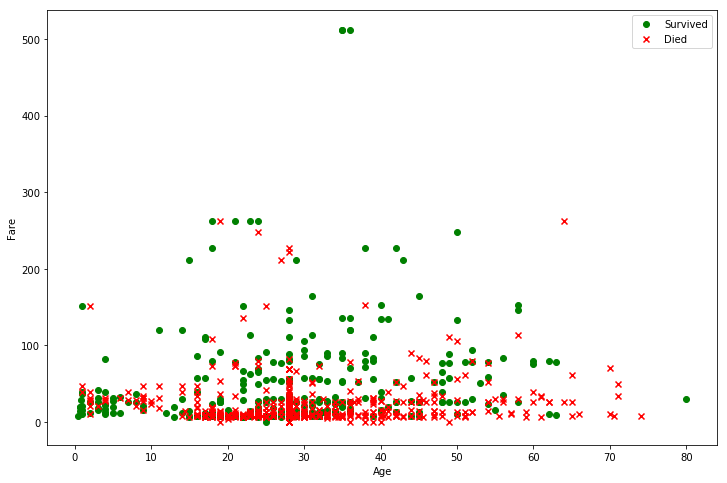

In [10]:
#Generamos el grafico de deisperción
survived = train[train['Survived'].isin([1])]
died = train[train['Survived'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(survived['Age'], survived['Fare'], c='g', marker='o', label='Survived')
ax.scatter(died['Age'], died['Fare'], c='r', marker='x', label='Died')
ax.legend()
ax.set_xlabel('Age')
ax.set_ylabel('Fare')

In [11]:
#Definimos el Sigmoide
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

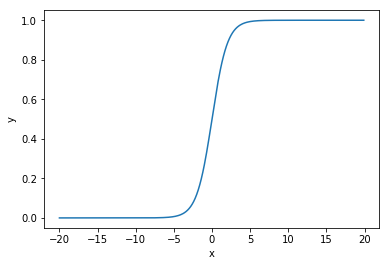

In [12]:
#Graficamos el Sigmoide
xs = np.arange(-20,20, 0.1)
ys = sigmoide(xs)
plot(xs, ys)
ylabel('y')
xlabel('x')
show()

In [13]:
#Definimos el costo de Teta (Grado de error)
def costo(Teta, X, Y):
    Teta = np.matrix(Teta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    A = np.multiply(-Y, np.log(sigmoide(X * Teta.T)))
    B = np.multiply((1 - Y), np.log(1 - sigmoide(X * Teta.T)))
    return np.sum(A - B) / (len(X))

In [15]:
data.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [16]:
data.insert(0, 'Ones', 1)

cs = data.shape[1]
X = data.iloc[:,0:cs-1]
Y = data.iloc[:,cs-1:cs]

X = np.array(X.values)
Y = np.array(Y.values)
Teta = np.zeros(3)

In [17]:
X.shape, Y.shape, Teta.shape

((891, 3), (891, 1), (3,))

In [18]:
costo(Teta,X,Y)

0.69314718055994529

In [19]:
def gradient(teta, x, y):
    teta = np.matrix(teta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    parameters = int(teta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoide(x * teta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, x[:,i])
        grad[i] = np.sum(term) / len(x)
    
    return grad

In [20]:
gradient(Teta, X, Y)

array([ 0.11616162,  3.82145342, -2.47391105])

In [21]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=costo, x0=Teta, fprime=gradient, args=(X, Y))
result

(array([-0.47438393, -0.01696571,  0.01618044]), 21, 1)

In [22]:
costo(result[0], X, Y)

0.62206032816953005

In [23]:
def predict(theta, X):
    probability = sigmoide(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [24]:
#Obtenemos la exactitud
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 584%
